In [32]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv("data/privheifacultystudratio20122013.csv")
df = df.dropna()

In [34]:
df.shape

(1602, 5)

In [35]:
df[df["higher_education_institution"].str.contains("Ateneo")].head()

,region,higher_education_institution,number_of_students,number_of_faculty,faculty_student_ratio
507,Region V,Ateneo De Naga University,6994,375,1 is to 19
861,Region IX,Ateneo De Zamboanga University,4334,270,1 is to 16
984,Region XI,Ateneo De Davao University,9465,451,1 is to 21
1167,NCR,Ateneo De Manila University,9979,621,1 is to 16
1168,NCR,Ateneo Graduate School of Business,4035,89,1 is to 45


In [36]:
df.dtypes

region                          object
higher_education_institution    object
number_of_students              object
number_of_faculty               object
faculty_student_ratio           object
dtype: object

In [37]:
df.tail()

,region,higher_education_institution,number_of_students,number_of_faculty,faculty_student_ratio
1597,Region IV-B,ACLC College of Calapan,201,19,1 is to 11
1598,Region IV-B,Pinamalayan Maritime Foundation and Technologi...,365,22,1 is to 17
1599,Region IV-B,STI College-Puerto Princesa,139,15,1 is to 9
1600,Region IV-B,Remnant Christian College-Palawan,ND,8,ND
1601,Region IV-B,Luna Goco College-Roxas,4,6,1 is to 1


In [38]:
df["number_of_faculty"] = pd.to_numeric(df["number_of_faculty"], errors='coerce')
df["number_of_students"] = pd.to_numeric(df["number_of_students"], errors='coerce')

In [39]:
df = df.dropna()
df.tail()

,region,higher_education_institution,number_of_students,number_of_faculty,faculty_student_ratio
1596,Region IV-B,Philippine Central Islands College Foundation,136.0,20.0,1 is to 7
1597,Region IV-B,ACLC College of Calapan,201.0,19.0,1 is to 11
1598,Region IV-B,Pinamalayan Maritime Foundation and Technologi...,365.0,22.0,1 is to 17
1599,Region IV-B,STI College-Puerto Princesa,139.0,15.0,1 is to 9
1601,Region IV-B,Luna Goco College-Roxas,4.0,6.0,1 is to 1


In [40]:
df.shape

(1556, 5)

Text(0.5,1,'Number of Faculty by Students')

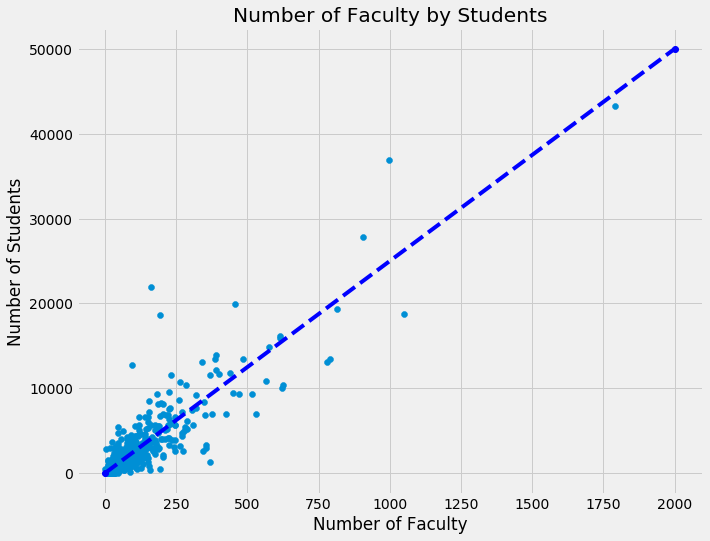

In [41]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

plt.scatter(df["number_of_faculty"], df["number_of_students"])
plt.plot([0, 2000], [0, 50000], '--bo')
plt.xlabel("Number of Faculty")
plt.ylabel("Number of Students")
plt.title("Number of Faculty by Students")

In [49]:
from sklearn.linear_model import LinearRegression

X = df[["number_of_faculty"]]

In [43]:
X.head()

,number_of_faculty
0,26.0
1,31.0
2,14.0
3,11.0
4,15.0


In [44]:
linear_model = LinearRegression()
linear_model.fit(X, df["number_of_students"])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
print(f"Coefficient values{linear_model.coef_}")

Coefficient values[24.32509776]


In [46]:
pd.DataFrame(list(zip(X.columns, linear_model.coef_)))

,0,1
0,number_of_faculty,24.325098


In [50]:
predictions = linear_model.predict(X)

In [53]:
df["PRED"] = predictions

In [56]:
df[["number_of_faculty", "number_of_students", "PRED"]].head()

,number_of_faculty,number_of_students,PRED
0,26.0,405.0,487.025552
1,31.0,450.0,608.651041
2,14.0,56.0,195.124379
3,11.0,357.0,122.149086
4,15.0,212.0,219.449477


Text(0.5,1,'Actual vs Predicted Plot')

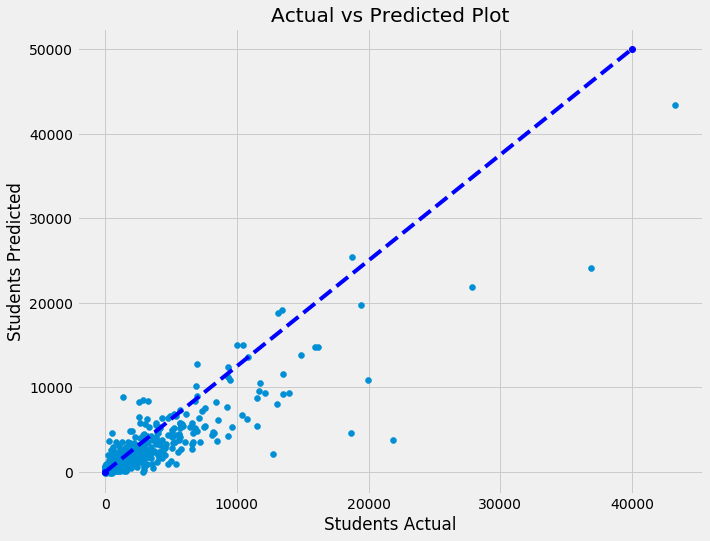

In [58]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

plt.scatter(df["number_of_students"], df["PRED"])
plt.plot([0, 40000], [0, 50000], '--bo')
plt.xlabel("Students Actual")
plt.ylabel("Students Predicted")
plt.title("Actual vs Predicted Plot")

In [62]:
import math
mean_squared_error = np.mean((df["number_of_students"] - linear_model.predict(X))**2)
math.sqrt(mean_squared_error)

1196.38964022379

In [60]:
linear_model.score(X, df["number_of_students"])

0.807184503167262